In [15]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
file_path = 'data/JOG_monthly.csv'
df = pd.read_csv(file_path, delimiter=';')
df['Date'] = pd.to_datetime(df['THBL'], format='%Y%m')
df['GWH_JUAL'] = MinMaxScaler().fit_transform(df[['GWH_JUAL']])
# df["Month"] = df.Date.dt.month
# df = pd.get_dummies(df, columns=["Month"])
df.set_index('Date', inplace=True)
df.drop(columns='THBL', inplace=True)
df.head()

,GWH_JUAL
Date,
2015-01-01,0.094838
2015-02-01,0.000000
2015-03-01,0.115178
2015-04-01,0.115373
2015-05-01,0.162993


In [6]:
ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)
ts_train.shape, ts_test.shape

((90, 1), (23, 1))

In [8]:
model = auto_arima(ts_train, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-233.898, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-204.393, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-222.337, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-232.529, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-206.058, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-230.402, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-234.493, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-239.026, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-237.800, Time=0.71 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-238.197, Time=0.93 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-236.304, T

In [9]:
n_forecast = len(ts_test)
forecast, conf_int = model.predict(n_periods=n_forecast, return_conf_int=True)

In [13]:
def mean_absolute_percentage_error(targets, preds):
    targets = np.array(targets)
    preds = np.array(preds)
    return np.mean(np.abs((targets - preds) / targets)) * 100

def symmetric_mean_absolute_percentage_error(targets, preds):
    targets = np.array(targets)
    preds = np.array(preds)
    return np.mean(2.0 * np.abs(preds - targets) / (np.abs(targets) + np.abs(preds))) * 100

Metrics for Test Data:
MAE  : 0.1739
MSE  : 0.0455
R²   : -1.0783
MAPE : 23.0710%
SMAPE: 27.5427%


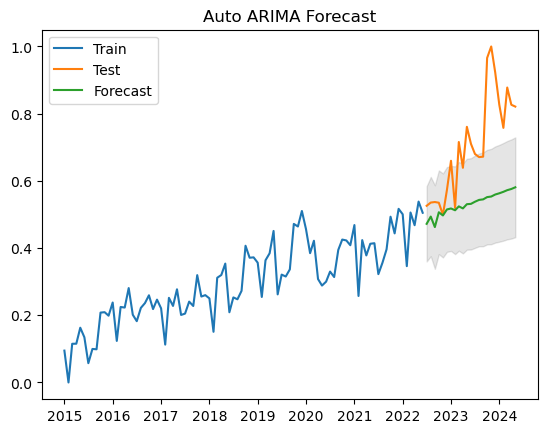

In [16]:
mae = mean_absolute_error(ts_test, forecast)
mse = mean_squared_error(ts_test, forecast)
r2 = r2_score(ts_test, forecast)
mape = mean_absolute_percentage_error(ts_test, forecast)
smape = symmetric_mean_absolute_percentage_error(ts_test, forecast)

print("Metrics for Test Data:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"SMAPE: {smape:.4f}%")
# Optional: Visualisasi hasil prediksi
# Misalnya menggunakan matplotlib
import matplotlib.pyplot as plt

plt.plot(ts_train.index, ts_train, label='Train')
plt.plot(ts_test.index, ts_test, label='Test')
plt.plot(ts_test.index, forecast, label='Forecast')
plt.fill_between(ts_test.index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
plt.title('Auto ARIMA Forecast')
plt.legend()
plt.show()